# Tutorial: Logistic Regression

### 1.1 Fundamentos de la técnica
La Regresión Logística es un método estadístico utilizado principalmente para resolver problemas de clasificación binaria, es decir, situaciones donde la variable objetivo solo puede tomar dos valores posibles (por ejemplo: spam/no spam, enfermo/sano, compra/no compra). Aunque su nombre contiene la palabra “regresión”, no se utiliza para predecir valores continuos, sino para modelar probabilidades.

La idea central del método es utilizar una combinación lineal de las variables de entrada (similar a la regresión lineal) y transformarla a un rango entre 0 y 1 mediante la función sigmoide. Esta salida representa la probabilidad de pertenecer a la clase positiva. Si la probabilidad supera un umbral (normalmente 0.5), el modelo clasifica la instancia en una clase; de lo contrario, la clasifica en la opuesta.

La regresión logística también se basa en el concepto de odds y log-odds, que permiten expresar cómo influyen las variables en la probabilidad de un evento. Además, el proceso de entrenamiento del modelo se realiza optimizando la función de pérdida conocida como log-loss o pérdida logarítmica, mediante métodos numéricos como Gradient Descent o Maximum Likelihood Estimation. Esto permite encontrar los parámetros que mejor separan las clases en el espacio de características.

Debido a su simplicidad, interpretabilidad y eficiencia, la regresión logística es uno de los modelos más utilizados en análisis de datos, biometría, economía, ciencias sociales y problemas de clasificación general. Aunque existen modelos más complejos, la regresión logística sigue siendo una base sólida para entender el funcionamiento de los clasificadores en Machine Learning.

### 1.2 Modelo Matemático del Perceptrón
La regresión logística calcula la probabilidad mediante:

$$p(y=1|x) = \sigma(z)$$

donde:

$$z = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

La predicción final es:

$$\hat{y} = \begin{cases} 1 & \text{si } p \ge 0.5 \\ 0 & \text{si } p < 0.5 \end{cases}$$

El modelo ajusta los parámetros $w$ y $b$ minimizando la función de pérdida logarítmica (log-loss).

### 1.3 Descripción de la librería, clases, funciones (python) empleadas en programar el Logistic Regression

Usaremos scikit-learn, una librería de Machine Learning en Python.
Los componentes clave:

Clases principales

**sklearn.linear_model.LogisticRegression**: Implementa el modelo.

**sklearn.model_selection.train_test_split**: Divide dataset en entrenamiento y prueba.

**sklearn.preprocessing.StandardScaler**: Normaliza variables.

**sklearn.pipeline.Pipelin**e: Construye un flujo completo de procesamiento.

Funciones principales

* **.fit()**: Entrena el modelo.

* **.predict()**: Predice clases.

* **.predict_proba()**: Calcula probabilidades.

* **.score()**: Calcula accuracy.

* **confusion_matrix()**: Matriz de confusión.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [9]:
# Cargar dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = (iris.target == 2).astype(int)

### 1.4. Pipeline del Logistic Regression


#### 1.4.1 Preprocesamiento

En esta fase se realiza un análisis estadístico básico del dataset para conocer la distribución de los valores, detectar posibles outliers y observar tendencias generales. Además, se generan gráficos de dispersión para visualizar relaciones entre variables. Finalmente, se normalizan las características mediante técnicas como StandardScaler, lo cual ayuda a que el modelo de regresión logística converja más rápido y de manera más estable.

In [10]:
print("Estadísticos del Dataset:")
display(X.describe())

Estadísticos del Dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


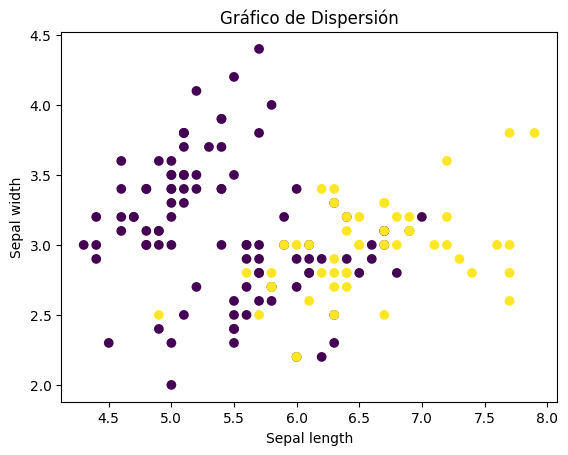

In [11]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Gráfico de Dispersión")
plt.show()

#### 1.4.2 Model Training

En esta etapa, el modelo de regresión logística aprende a partir de los datos de entrenamiento. Utiliza los valores transformados para ajustar sus parámetros internos mediante un proceso de optimización. Una vez entrenado, el modelo es capaz de generalizar patrones presentes en los datos y realizar predicciones sobre nuevas instancias.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

#### 1.4.3 Prediction

La etapa de predicción consiste en enviar un nuevo patrón (un conjunto de características) al modelo ya entrenado para obtener una clase estimada. En este notebook, se implementa una función que recibe un vector con las características de una flor y devuelve si corresponde a la clase Virginica o no. Esta función encapsula el preprocesamiento y la predicción, permitiendo clasificar nuevos datos de forma sencilla.

In [13]:
def predecir_clase(patron):
    columnas = X.columns

    patron_df = pd.DataFrame([patron], columns=columnas)
    patron_scaled = scaler.transform(patron_df)

    prediccion = model.predict(patron_scaled)[0]
    print("Clase predicha:", "Virginica" if prediccion == 1 else "No Virginica")

predecir_clase([5.8, 2.7, 5.1, 1.9])

Clase predicha: Virginica


#### 1.4.4 Model Evaluation

La evaluación del modelo permite medir qué tan bien funciona la regresión logística. Usamos la matriz de confusión para observar los aciertos y errores del modelo y la métrica de accuracy para conocer el porcentaje total de predicciones correctas. Estas métricas permiten analizar el desempeño del modelo y validar si es adecuado para el problema.

In [14]:
y_pred = model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {acc:.4f}")

Matriz de Confusión:
[[32  0]
 [ 0 13]]
Accuracy del modelo: 1.0000


### 1.5 Referencias bibliográficas

LogisticRegression. (s. f.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

GeeksforGeeks. (2025b, noviembre 18). Logistic Regression in Machine Learning. GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/understanding-logistic-regression/

Lee, F. (2025, 17 noviembre). Logistic Regression. IBM. https://www.ibm.com/think/topics/logistic-regression

Logistic regression. (s. f.). Google For Developers. https://developers.google.com/machine-learning/crash-course/logistic-regression
